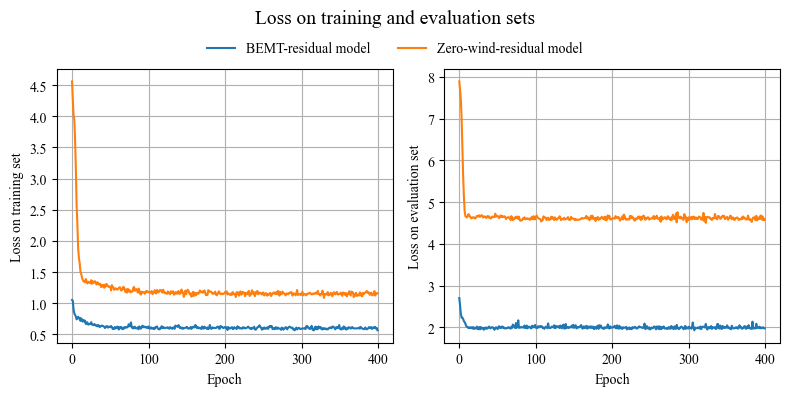

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
# Get the current directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import common_utils.file_manager

def load_loss_history(path, label):
    data = np.load(path)
    loss_train = data["loss_trace"]
    loss_val = data["loss_trace_on_validation"]
    return {
        "label": label,
        "loss_train": loss_train,
        "loss_val": loss_val,
    }

# --- Load both runs ---
bemt = load_loss_history("bemt.npz", label="BEMT model")
zerowind = load_loss_history("zerowind.npz", label="Zero-wind model")

# --- Matplotlib / paper style ---
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "stix"

figsize = (8, 4)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, sharex=True)

epochs_bemt = np.arange(len(bemt["loss_train"]))
epochs_zerowind = np.arange(len(zerowind["loss_train"]))

# === Left: training loss ===
ax1.plot(
    epochs_bemt,
    bemt["loss_train"],
    # color='orange',
    linestyle='-',
)
ax1.plot(
    epochs_zerowind,
    zerowind["loss_train"],
    # color='orange',
    linestyle='-',
)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss on training set")
ax1.grid(True)

# === Right: validation loss ===
ax2.plot(
    epochs_bemt,
    bemt["loss_val"],
    # color='orange',
    linestyle='-',
)
ax2.plot(
    epochs_zerowind,
    zerowind["loss_val"],
    # color='orange',
    linestyle='-',
)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss on evaluation set")
ax2.grid(True)

# === Title ===
fig.suptitle(
    r"Loss on training and evaluation sets",
    fontsize=14,
    y=0.98,   # push title upward slightly
)

# === Shared legend directly below title ===
fig.legend(
    ["BEMT-residual model", "Zero-wind-residual model"],
    loc="upper center",
    bbox_to_anchor=(0.5, 0.93),
    ncol=2,
    frameon=False,
)

# Adjust layout so plots fit under legend + title
fig.tight_layout(rect=[0, 0, 1, 0.95])

# === Save and show ===
output_path = common_utils.file_manager.find_path_to_folder(
    ["paper_results", "loss_comparison_bemt_vs_zerowind.png"]
)
fig.savefig(
    output_path,
    bbox_inches="tight",
    dpi=1000
)
plt.show()
